<a href="https://colab.research.google.com/github/sunilpaul29/BayesianTutorials/blob/master/Students'_Sample_Module_11_Basic_Regression_Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression: Analysis and Concepts

Reference: https://youtu.be/nk2CQITm_eo


- We review the regression routine with the ridge model.
- We learn to make prediction with the model and learn the concept MSE.
- We learn *how* a linear model make predictions, which enables us to interpret its coefficients.
- We then go into what a linear model does when it makes up its coefficients.
- Finally, we'll learn some linear algebra.

In [ ]:
import numpy as np
import pandas as pd
import numpy.random as rnd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# load community crime data
crime = pd.read_table('https://drive.google.com/uc?id=1LV6hDarh58-j4K6X19C0wrBnQtxWpMOY', sep=',', na_values='?')
cols_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]

crime = crime.iloc[:,cols_to_keep].dropna()


# feature data and outcome variable:
X_crime = crime.iloc[:,:88]
Y_crime = crime.iloc[:,88]

## A Basic Regression Routine

1. Data and package setup

In [ ]:
# scaled X; this would be the data for regression
X_scaled = StandardScaler().fit_transform(X_crime)
X_scaled = pd.DataFrame(X_scaled, columns=X_crime.columns)


In [ ]:

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


ridge = Ridge(random_state=42, solver='svd')  # tune alpha
# svr_lin = SVR(kernel = 'linear')              # tune C                             
# svr_rbf = SVR(kernel = 'rbf')                 # tune C AND gamma
# tree = DecisionTreeRegressor(random_state=11)                # tune max_depth and min_samples_leaf
# rf = RandomForestRegressor()                  # tune max_depth and min_samples_leaf
# knn = KNeighborsRegressor()                   # tune k_neighbors



2. Use GridSearchCV(cv=5) technique we learned in Module 2 to tune the best alpha for the `ridge` model. Report R2 as regression score.

In [ ]:
from sklearn.feature_selection import RFECV

# define the classifier
  # using best combination of parameters as searched by GridSearchCV
model = ridge  # tune alpha


rfe = RFECV(model,                      # classifier at work
            step=1,                    
            min_features_to_select=1,  
            # verbose =3
            )
rfe.fit(X_scaled, Y_crime)

# rfe algorithim for step=1:
  # take one feature out of train set and train the model, then take the accuracy score; repeat for all features
    # ex: take out 1st feature, then puts it back and takes out the 2nd
  # find the feature that impacts the performance score the least

ft_importance = pd.DataFrame({'feature': X_scaled.columns,'feature_importance':rfe.ranking_})
ft_importance = ft_importance.sort_values('feature_importance', ascending=True)
ft_importance.head(30)

,feature,feature_importance
53,PctLargHouseOccup,1
33,PctFam2Par,1
52,PctLargHouseFam,1
40,PctKidsBornNeverMar,1
58,PctPersDenseHous,1
34,PctKids2Par,1
51,PctNotSpeakEnglWell,2
77,MedRent,3
73,RentLowQ,4
83,PctForeignBorn,5


3. Review the RFECV(cv=5) technique from Module 3 to find 1st-ranked features by importance.

In [ ]:
top1 = ft_importance.loc[ft_importance['feature_importance']==1]['feature']
top1

53      PctLargHouseOccup
33             PctFam2Par
52        PctLargHouseFam
40    PctKidsBornNeverMar
58       PctPersDenseHous
34            PctKids2Par
Name: feature, dtype: object

In [ ]:
X_small = X_scaled[top1]
X_small.describe()


,PctLargHouseOccup,PctFam2Par,PctLargHouseFam,PctKidsBornNeverMar,PctPersDenseHous,PctKids2Par
count,1.994000e+03,1.994000e+03,1.994000e+03,1.994000e+03,1.994000e+03,1.994000e+03
mean,3.947583e-17,-2.918650e-16,-2.294498e-16,-1.453201e-17,1.057886e-17,5.602339e-16
std,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00
min,-1.069964e+00,-4.045145e+00,-1.146575e+00,-1.021631e+00,-7.333063e-01,-3.782451e+00
25%,-4.888492e-01,-6.047541e-01,-5.280829e-01,-6.693994e-01,-5.189061e-01,-6.149312e-01
50%,-2.800112e-01,8.439213e-02,-2.990116e-01,-3.448256e-01,-3.182275e-01,9.794549e-02
75%,9.226543e-02,7.519343e-01,1.254065e-01,2.734101e-01,1.019969e-01,7.525593e-01
max,8.140098e+00,1.912729e+00,7.484320e+00,6.849486e+00,9.461852e+00,1.830213e+00


4. Tune the best ridge model to regress the data `X_small` on `Y_crime`. Apply the method `coef_` on your fit model to obtain the predictive coefficients from the model.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

model = Ridge(random_state=42, solver='svd')

grid_values = {'alpha': [0, 0.1, 0.5, 1, 5, 10, 100]}


grid_clf_acc = GridSearchCV(model,              
                            param_grid = grid_values,
                            cv=5)                    
grid_clf_acc.fit(X_small, Y_crime)

print('Grid best parameter (R2): ', grid_clf_acc.best_params_)
print('Grid best score (R2): ', grid_clf_acc.best_score_)

Grid best parameter (R2):  {'alpha': 1}
Grid best score (R2):  0.5900886669502569


## 💥💥 Making predictions and interpreting **linear** models

5. Ridge regression using the tuned parameter value:

In [ ]:
# NO scaling
X_small = X_crime[top1]
ridge_model = Ridge(alpha=1, random_state=42, solver='svd')
ridge_model.fit(X_small, Y_crime)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='svd', tol=0.001)

In [ ]:
# Extract row using .loc[]
X_small.loc[2210]

PctLargHouseOccup       9.91
PctFam2Par             67.04
PctLargHouseFam        13.49
PctKidsBornNeverMar     4.49
PctPersDenseHous       16.89
PctKids2Par            64.81
Name: 2210, dtype: float64

6. A sneaky introduction to **linear algebra**: matrices and vectors

In [ ]:
# we'll work with the matrix version of X_small
# numpy array (matrix)
X_small.values

array([[ 4.17, 91.43,  4.81,  0.36,  0.39, 90.17],
       [ 3.34, 86.91,  4.25,  0.24,  1.01, 85.33],
       [ 2.05, 78.54,  2.97,  0.88,  2.03, 78.85],
       ...,
       [ 3.5 , 76.77,  5.1 ,  1.6 ,  4.39, 74.2 ],
       [ 7.1 , 67.76,  9.83,  2.35,  9.64, 63.45],
       [ 5.7 , 62.64,  8.58,  4.85, 11.31, 60.23]])

In [ ]:
# panda series
X_small

,PctLargHouseOccup,PctFam2Par,PctLargHouseFam,PctKidsBornNeverMar,PctPersDenseHous,PctKids2Par
0,4.17,91.43,4.81,0.36,0.39,90.17
1,3.34,86.91,4.25,0.24,1.01,85.33
2,2.05,78.54,2.97,0.88,2.03,78.85
3,2.56,64.02,3.93,3.84,1.21,62.36
5,1.92,71.94,3.08,1.58,2.11,69.79
...,...,...,...,...,...,...
2210,9.91,67.04,13.49,4.49,16.89,64.81
2211,3.37,68.57,5.03,2.98,3.99,63.66
2212,3.50,76.77,5.10,1.60,4.39,74.20
2213,7.10,67.76,9.83,2.35,9.64,63.45


In [ ]:
# each row of a matrix is a vector:
X_small.values[4,:].reshape(1,-1)

array([[ 1.92, 71.94,  3.08,  1.58,  2.11, 69.79]])

In [ ]:
# extract 4th row in X_small as vector
X_small.values[4,:]

array([ 1.92, 71.94,  3.08,  1.58,  2.11, 69.79])

`model.predict_` method works with **matrix** of the same number of columns as when we `.fit()` the model:

In [ ]:
# extracting rows 0,1 from X_small
x = X_small.values[0:10,:] # we'll need to learn this syntax
x

array([[ 4.17, 91.43,  4.81,  0.36,  0.39, 90.17],
       [ 3.34, 86.91,  4.25,  0.24,  1.01, 85.33],
       [ 2.05, 78.54,  2.97,  0.88,  2.03, 78.85],
       [ 2.56, 64.02,  3.93,  3.84,  1.21, 62.36],
       [ 1.92, 71.94,  3.08,  1.58,  2.11, 69.79],
       [ 3.46, 79.53,  5.08,  1.18,  1.47, 79.76],
       [ 2.55, 62.56,  3.85,  4.66,  1.9 , 58.7 ],
       [ 1.54, 79.35,  2.59,  1.64,  1.67, 79.7 ],
       [ 4.1 , 61.65,  6.7 ,  4.71,  6.14, 54.56],
       [ 2.51, 68.41,  3.66,  2.47,  3.41, 64.64]])

In [ ]:
ridge_model.predict(x)

array([ -35.96484787,   72.13029811,  202.22219424,  701.8842388 ,
        455.7582274 ,  229.18952011,  867.66665453,  257.87726372,
       1124.44181133,  635.52727854])

In [ ]:
# we could also predict crime rate for a made-up town, by making up a town:
town = np.array([[4,90,5, 1, 1, 90]])
ridge_model.predict(town)

array([20.04142942])

Notice the difference beween matrix and vectors

In [ ]:
#matrix
m = np.array([[4,90,5, 1, 1, 90]])
m

array([[ 4, 90,  5,  1,  1, 90]])

In [ ]:
m2 = np.array([[1,2],[3,4]])
m2

array([[1, 2],
       [3, 4]])

In [ ]:
# vector
v = np.array([4,90,5, 1, 1, 90])
v

array([ 4, 90,  5,  1,  1, 90])

7. Making and interpreting predictions with a linear model with method `.coef_`

In [ ]:
# all linear models produce a set of coefficients
ridge_model.coef_

array([-87.96702512,  23.19382765,  69.98805505,  72.36874367,
        13.6158932 , -37.05667818])

In [ ]:
# each of these is associated with single feature column:
X_small.columns

Index(['PctLargHouseOccup', 'PctFam2Par', 'PctLargHouseFam',
       'PctKidsBornNeverMar', 'PctPersDenseHous', 'PctKids2Par'],
      dtype='object')

In [ ]:
# we put them together in a dataframe 
pd.DataFrame({'column': X_small.columns, 'coefficient': ridge_model.coef_})

,column,coefficient
0,PctLargHouseOccup,-87.967025
1,PctFam2Par,23.193828
2,PctLargHouseFam,69.988055
3,PctKidsBornNeverMar,72.368744
4,PctPersDenseHous,13.615893
5,PctKids2Par,-37.056678


In [ ]:
# we predict crime rate for a made-up town, by making up a town:
town = np.array([[4,90,5, 1, 1, 90]])
ridge_model.predict(town)

array([20.04142942])

What if the town's rate of large house occupation increase by 1 per cent? Compare our prediction for town

In [ ]:
# how to increase one value of a matrix by 1
town + np.array([[1, 0,0,0,0,0]])

array([[ 5, 90,  5,  1,  1, 90]])

In [ ]:
ridge_model.predict(town + np.array([[1, 0,0,0,0,0]]))

array([-67.9255957])

What if the town's rate kids with both parents increase by 1 per cent? Compare with our prediction for town.

In [ ]:
town + np.array([[0,0,0,0,0,1]])

array([[ 4, 90,  5,  1,  1, 91]])

In [ ]:
ridge_model.predict(town + np.array([[0,0,0,0,0,1]]))

array([-17.01524876])

8. Interpret linear model's coefficients

In [ ]:
# compare how our prediction changes when increasing by 1
ridge_model.predict(town + np.array([[0, 0,0,0,0,1]])) - ridge_model.predict(town)

array([-37.05667818])

In [ ]:
# *** Summarize interpretation od linear models
# Our prediction model produces a list of coefficent by the method .coef_.

# Each coefficent is matched with one feature in the data

# **Experiment**: Increase the value of one feature by 1 unit while holding the value of all other features the same. How does the model predict for the outcome change?

# Answer: The model prediction would change by the exact value of the coefficent associated with the changing feature in our experiment.

# **Warning**: Other SKlearn regression models also have '.predict()' method but not all of them can be interpreted in this manner. 

In [ ]:
pd.DataFrame({'column': X_small.columns, 'coefficient': ridge_model.coef_})

,column,coefficient
0,PctLargHouseOccup,-87.967025
1,PctFam2Par,23.193828
2,PctLargHouseFam,69.988055
3,PctKidsBornNeverMar,72.368744
4,PctPersDenseHous,13.615893
5,PctKids2Par,-37.056678


## Prediction errors and MSE

In [ ]:
# a random town in the data (matrix version)
X_small.values[1545,:].reshape(1,-1)

array([[ 1.97, 76.11,  3.07,  1.1 ,  1.31, 75.93]])

In [ ]:
# our prediction for its crime rate:
ridge_model.predict(X_small.values[1545,:].reshape(1,-1))

array([274.22054135])

In [ ]:
# the actual crime rate:
Y_crime.loc[1545]

1230.84

In [ ]:
# our prediction errors:
Y_crime.loc[1545] - ridge_model.predict(X_small.values[1545,:].reshape(1,-1))


array([956.61945865])

9. Model prediction for a whole dataset:

In [ ]:
ridge_model.predict(X_small.values)

array([ -35.96484787,   72.13029811,  202.22219424, ...,  439.24404706,
        768.74915736, 1008.64843071])

In [ ]:
# use command len() to count the length of an array
len(ridge_model.predict(X_small.values))

1994

Using linear algebra we calculat errors for all predictions at once:

In [ ]:
Y_crime

0        41.02
1       127.56
2       218.59
3       306.64
5       442.95
         ...  
2210    545.75
2211    124.10
2212    353.83
2213    691.17
2214    918.89
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

Mean squared errors algorithm:
- calulate prediction error for wach and every predicitioon (actual y - predictied y).
- calculate the square of each and every error.
- calculate the mean of all the squared errors calculated by the first 2 steps.

Defintion of mean squared error:
$$ \frac{1}{N} \sum_{i=1}^{N}{(y_i-\hat{y_i})^2}$$

Maybe a little viz can help:
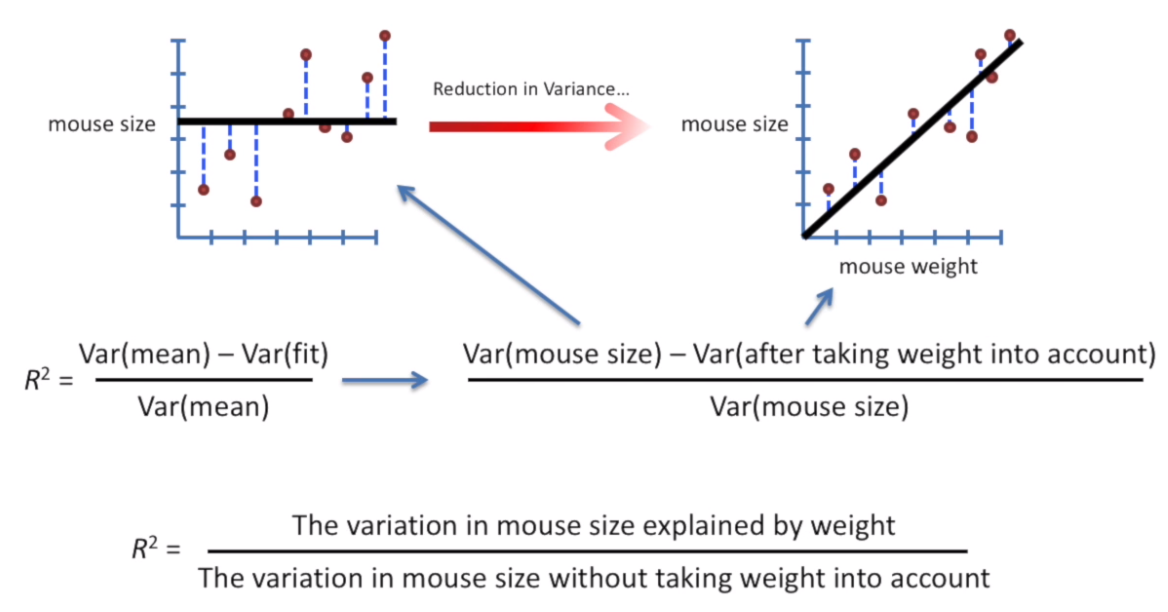

In [ ]:
# regression errors = y - predicted y
Y_crime - ridge_model.predict(X_small.values)

0        76.984848
1        55.429702
2        16.367806
3      -395.244239
5       -12.808227
           ...    
2210   -418.455797
2211   -616.491107
2212    -85.414047
2213    -77.579157
2214    -89.758431
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

In [ ]:
((Y_crime - ridge_model.predict(X_small.values))**2)

0         5926.666802
1         3072.451852
2          267.905065
3       156218.008304
5          164.050689
            ...      
2210    175105.254207
2211    380061.284667
2212      7295.559435
2213      6018.525657
2214      8056.575884
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

In [ ]:
# square up the errors and take the mean
np.mean((Y_crime - ridge_model.predict(X_small.values))**2)

151955.33503171438

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_crime, ridge_model.predict(X_small.values))

151955.33503171458

The MSE formula $$ \frac{1}{N} \sum_{i=1}^{N}{(y_i-\bar{Y}_{1})^2}$$ for any prediction model is a measurement of how much (squared) errors we make while predicting with that model.

The simplest prediction model is just the mean of Y, denoted $\bar{Y}$/. When we use $\bar{Y}$ as a predictor, the mean amount of squared errors we make is called variance, denoted as $var{Y}$. this would be the benchmark amount of squared error against which we compare all other prediction models.

when our prediction model makes amount of squared erros = MSE, it means that our model helps us reduce prediction error by the amount $var{Y} - MSE$. As a fraction of the benchmark errror, this amount is $$ R^2 = \frac{var(Y) - MSE}{var(Y)}$$

## Exercise

In [ ]:
# we'll apply the formula above to calculate r2 score
from sklearn.metrics import r2_score
r2_score(Y_crime, ridge_model.predict(X_small.values))

0.5977574928650806

- Calculate the mean of the array `Y_crime` with command `np.mean()`
- Calculate the variance of the array `Y_crime` with command `np.var()` 
- Calculate the formula $$ \frac{1}{N} \sum_{i=1}^{N}{(y_i-\bar{Y}_{crime})^2}$$ by:
  * Subtract the mean of Y_crime from each and every element of Y_crime
  * Square up the differences
  * Take the average of all the difference

Calculate R2 for the ridge model by the formula:
$$\frac{var(Y_{crime})-MSE}{var(Y_{crime})}$$

In [ ]:
np.mean(Y_crime)

589.0789217652964

In [ ]:
np.var(Y_crime)

377770.4552262694

In [ ]:
(np.var(Y_crime) - mean_squared_error(Y_crime, ridge_model.predict(X_small.values)))/np.var(Y_crime)

0.5977574928650802

What does MSE mean?

In [ ]:
Y_crime - np.mean(Y_crime)

0      -548.058922
1      -461.518922
2      -370.488922
3      -282.438922
5      -146.128922
           ...    
2210    -43.328922
2211   -464.978922
2212   -235.248922
2213    102.091078
2214    329.811078
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

In [ ]:
(Y_crime - np.mean(Y_crime))**2

0       300368.581727
1       212999.715147
2       137262.041151
3        79771.744528
5        21353.661776
            ...      
2210      1877.395461
2211    216205.397686
2212     55342.055192
2213     10422.588255
2214    108775.347326
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

In [ ]:
np.mean((Y_crime - np.mean(Y_crime))**2)

377770.4552262694

## How does a linear model make prediction?

In [ ]:
print(ridge_model.intercept_)
print(ridge_model.coef_)

1183.641165413104
[-87.96702512  23.19382765  69.98805505  72.36874367  13.6158932
 -37.05667818]


In [ ]:
X_small.columns

Index(['PctLargHouseOccup', 'PctFam2Par', 'PctLargHouseFam',
       'PctKidsBornNeverMar', 'PctPersDenseHous', 'PctKids2Par'],
      dtype='object')

A linear model predicting crime numbers in a community:

Crime per Capita = an intercept + PctLargeHouseOccup * (-87) + PctFam2Par * (23) + ... + PctKids2Par * (-37)

A more general, mathematic representation:
$$ \hat{y} = a+ x_0*b_0 + x_1*b_1 + \ldots + x_k*b_k$$

**Linear algebra** allows us to do this calculation along all rows of the dataframe at once:
$$ \hat{Y} = a+ X_0*b_0 + X_1*b_1 + \ldots + X_k*b_k + {error}$$

Then even more fanceeeee:
$$ Y = a+ X@b^\intercal + {residual}$$



In [ ]:
a = ridge_model.intercept_
b = ridge_model.coef_

In [ ]:
a

1183.641165413104

In [ ]:
b

array([-87.96702512,  23.19382765,  69.98805505,  72.36874367,
        13.6158932 , -37.05667818])

In [ ]:
# mactching b values with their respective features
dict(zip(X_small.columns, b))

{'PctFam2Par': 23.19382764750879,
 'PctKids2Par': -37.056678176659304,
 'PctKidsBornNeverMar': 72.36874366812269,
 'PctLargHouseFam': 69.98805504674917,
 'PctLargHouseOccup': -87.96702511995696,
 'PctPersDenseHous': 13.615893203735297}

In [ ]:
# calculate # a + x_0*b_0 + ... + x_k*b_k


In [ ]:
# get column 0 from X_crime and call it x_0:
X_small.values

array([[ 4.17, 91.43,  4.81,  0.36,  0.39, 90.17],
       [ 3.34, 86.91,  4.25,  0.24,  1.01, 85.33],
       [ 2.05, 78.54,  2.97,  0.88,  2.03, 78.85],
       ...,
       [ 3.5 , 76.77,  5.1 ,  1.6 ,  4.39, 74.2 ],
       [ 7.1 , 67.76,  9.83,  2.35,  9.64, 63.45],
       [ 5.7 , 62.64,  8.58,  4.85, 11.31, 60.23]])

In [ ]:
X_small.values[: , 0]

array([4.17, 3.34, 2.05, ..., 3.5 , 7.1 , 5.7 ])

In [ ]:
x_0 = X_small.values[: , 0]
x_0

array([4.17, 3.34, 2.05, ..., 3.5 , 7.1 , 5.7 ])

In [ ]:
# compare ridge.predict(X_small) with what we just calculated
x_0*ridge_model.coef_[0]

array([-366.82249475, -293.8098639 , -180.3324015 , ..., -307.88458792,
       -624.56587835, -501.41204318])

In [ ]:
x_1 = X_small.values[: , 1]
x_2 = X_small.values[: , 2]
x_3 = X_small.values[: , 3]
x_4 = X_small.values[: , 4]
x_5 = X_small.values[: , 5]

In [ ]:
a + x_0*b[0] + x_1*b[1] + x_2*b[2] + x_3*b[3] + x_4*b[4] + x_5*b[5]

array([ -35.96484787,   72.13029811,  202.22219424, ...,  439.24404706,
        768.74915736, 1008.64843071])

In [ ]:
ridge_model.predict(X_small)

array([ -35.96484787,   72.13029811,  202.22219424, ...,  439.24404706,
        768.74915736, 1008.64843071])

in matrix algebra a term:
- is an intercept
- b = [b0, b1, ...] is a vector of coefficients
- x = [X_0, ...., X_5] contains all features of the data X_small

In [ ]:
a + X_small@b.T

0        -35.964848
1         72.130298
2        202.222194
3        701.884239
5        455.758227
           ...     
2210     964.205797
2211     740.591107
2212     439.244047
2213     768.749157
2214    1008.648431
Length: 1994, dtype: float64

In [ ]:
# we put them together in a dataframe 
pd.DataFrame({'column': X_small.columns, 'coefficient': ridge_model.coef_})

,column,coefficient
0,PctLargHouseOccup,-87.967025
1,PctFam2Par,23.193828
2,PctLargHouseFam,69.988055
3,PctKidsBornNeverMar,72.368744
4,PctPersDenseHous,13.615893
5,PctKids2Par,-37.056678


### How does linear regression find a and b in a+X*b?

In [ ]:
# extract only feature column #3 from X_small:
X_3 = X_small.values[:,3].reshape(-1,1)

In [ ]:
# regress Y_crime on X_3
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_small.values[:,3].reshape(-1,1), Y_crime)
print(lin_reg.intercept_)
print(lin_reg.coef_)


125.61401016913209
[147.61254979]


In [ ]:
a = lin_reg.intercept_
b = lin_reg.coef_

In [ ]:
b.T

array([147.61254979])

What do the intercept and coefficient we estimated mean? Remember the general linear regression formula:
$ \hat{y} = a+ x*b$

In [ ]:
a = lin_reg.intercept_
b = lin_reg.coef_

In [ ]:
resid = Y_crime - a - X_3@b.T
resid

0      -137.734528
1       -33.481022
2       -36.923054
3      -385.806201
5        84.108161
           ...    
2210   -242.644359
2211   -441.399409
2212     -7.964090
2213    218.666498
2214     77.355123
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

In [ ]:
mse = np.mean(resid**2)
mse

171970.36860935422

In [ ]:
# create a simple function to calculate MSE repeatedly
def mse_score(X, Y, a,b):
  resid = Y - a - (X)@np.array([b]).T
  mse = np.mean(resid**2)
  return mse


In [ ]:
mse_score(X=X_3,
          Y=Y_crime, 
          a = lin_reg.intercept_, 
          b=lin_reg.coef_[0])

171970.36860935422

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

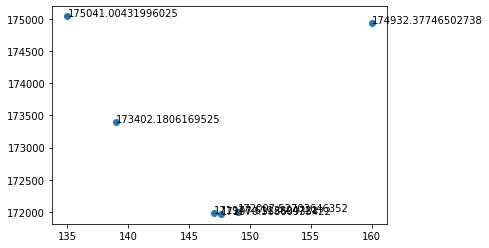

In [ ]:
bs = [lin_reg.coef_[0], 135, 139, 147, 149, 160]

mse_score(X=X_3,
          Y=Y_crime, 
          a = lin_reg.intercept_, 
          b=11000)

mse_b = [mse_score(X=X_3, Y=Y_crime,  a = lin_reg.intercept_,  b=b) for b in bs]



plt.scatter(bs, mse_b, marker='o')
for b in bs:
  plt.annotate(mse_score(X=X_3, Y=Y_crime,  a = lin_reg.intercept_,  b=b),
               (b,
                mse_score(X=X_3, Y=Y_crime,  a = lin_reg.intercept_,  b=b)))
# Show the boundary between the regions:

plt.show()

## Taking stock: The alogrithm of linear regression
1. The set up:
 we have column feature, called X_3, and an outcome variable to predict, call Y_crime.
2. Assumption of the model: 
our prediction would a linear finction of X: $$\hat{y} = a + X*b$$.
3. The loss function and the model's objective: 
MSE as calculated by the prediction errors from $\hat{y}$.
  - **objective** : find a set of a and b that would minimize MSE
4. How to **estimate** the model coefficients: 
Use an algorithm called "gradient descent" to find a pair of a and b that would minimize MSE



## Linear algebra exercise

In [ ]:
v1 = np.array([1,3,5,6])
v2 = np.array([2,4,7,9])

1. Create vector v3 with the same number of elements as v1 and v2 (any value you like)

In [ ]:
v3 = np.array([10,13,16,19])

2. Add v1 and v2

In [ ]:
v1 + v2

array([ 3,  7, 12, 15])

3. Subtract v2 from v3

In [ ]:
v3 - v2

array([ 8,  9,  9, 10])

4. Try this multiplication and look up what we do when we multiply 2 vectors

In [ ]:
v1@v2

103

In [ ]:
v1@v3

243

5. Try `v1+5` and `v2-10`





In [ ]:
v1+5

array([ 6,  8, 10, 11])

In [ ]:
v2-10

array([-8, -6, -3, -1])

6. Create a new matrix. Tutorial https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

In [ ]:
m1 = np.matrix([[1, 3, 5, 7],
               [2, 4, 6 ,8], 
               [3, 6, 9, 0]])
m1

matrix([[1, 3, 5, 7],
        [2, 4, 6, 8],
        [3, 6, 9, 0]])

7. Create a matrix `m2` of 4 row * 2 columns of any values you want using the syntax above.

In [ ]:
m2 = np.matrix([[2, 3],
               [5 ,7], 
               [10, 16],
                [1, 5]])
m2

matrix([[ 2,  3],
        [ 5,  7],
        [10, 16],
        [ 1,  5]])

8. Extract the 2nd row of m1
9. Extract the 1rd colulmn of m2

In [ ]:
m1[1,:]

matrix([[2, 4, 6, 8]])

In [ ]:
m2[:,0]

matrix([[ 2],
        [ 5],
        [10],
        [ 1]])

10. Extract the element in 3rd row and 1st column of m1

In [ ]:
m1[2,0]

3

11. Multiply m1 with number 10

In [ ]:
m1*10

matrix([[10, 30, 50, 70],
        [20, 40, 60, 80],
        [30, 60, 90,  0]])

12. Divide m2 by number 2

In [ ]:
m2/2

matrix([[1. , 1.5],
        [2.5, 3.5],
        [5. , 8. ],
        [0.5, 2.5]])

14. Use the `@` operation to multiply m1 with the first column of m2




In [ ]:
m1@m2[:,0]

matrix([[ 74],
        [ 92],
        [126]])

In [ ]:
m1[2,:]@m2[:,0]

matrix([[126]])

15. Use the `@` operation to multiply m1 with the first row of m2. It gives you an error. Why?

In [ ]:
m1@m2[0,:]
# the dimensions do not match up and cannot be multiplied because there are different elements

ValueError: ignored

16. Use the `@` operation to multiply m1 with m2

In [ ]:
m1@m2
# ustack m1 to its seperate rows
# unstack m2 to its seperate columns

# perform @ for every row of m1 with every column of m2

matrix([[ 74, 139],
        [ 92, 170],
        [126, 195]])

In [ ]:
m1[1,:]@m2[:,1]

matrix([[170]])

17. Use the `@` operation to multiply m1 with m1. Error. Why?

In [ ]:
m1@m1
# you cannot multiple the same matrix becasue it has different columns and rows if you were going to multiply

ValueError: ignored

18. Try `m1.T` and try `m1@m1.T`. Explain why this works but not 17.

In [ ]:
m1.T
# transpose of m1

matrix([[1, 2, 3],
        [3, 4, 6],
        [5, 6, 9],
        [7, 8, 0]])

In [ ]:
m1@m1.T
# this works because there are two possible outcomes now

matrix([[ 84, 100,  66],
        [100, 120,  84],
        [ 66,  84, 126]])

In [ ]:
m1.T@m1

matrix([[ 14,  29,  44,  23],
        [ 29,  61,  93,  53],
        [ 44,  93, 142,  83],
        [ 23,  53,  83, 113]])

### Take stock:
- When we add a vector or a matrix with a number
- When we add or subtract 2 vectors
- When we multiply 2 vectors
- When we multiply a matrix with a number
- When we multiply a matrix with a **vertical** vector
- When we multiply a matrix with another matrix